In [35]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
train_df=pd.read_csv("data/train.csv")

In [4]:
#Count Vectorizer
countVectorizer=feature_extraction.text.CountVectorizer()
train_vectors_count=countVectorizer.fit_transform(train_df["text"])

In [24]:
#TF-IDF Vectorizer
tfidfVectorizer=feature_extraction.text.TfidfVectorizer()
train_vectors_tfidf=tfidfVectorizer.fit_transform(train_df["text"])
print(train_vectors_tfidf.shape)

(7613, 21637)


In [36]:
modelSVM=SVC(kernel='linear', C=0.5)

2


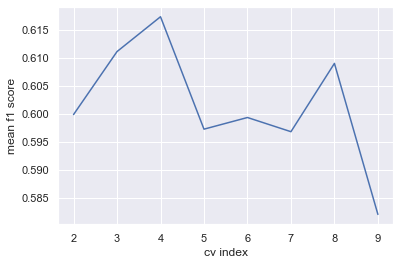

In [46]:
meanscore=np.zeros((8))
for cvvalue in range(2,10):
    scores_count=model_selection.cross_val_score(modelSVM, train_vectors_count, train_df["target"], cv=cvvalue, scoring="f1")
    meanscore[cvvalue-2]=scores_count.mean()
plt.plot(range(2,10), meanscore)
plt.xlabel("cv index")
plt.ylabel("mean f1 score")
print(np.argmax(meanscore))


In [27]:
scores_count=model_selection.cross_val_score(modelSVM, train_vectors_tfidf, train_df["target"], cv=3, scoring="f1")
print(scores_count, scores_count.mean())

[0.62308598 0.55626822 0.66702761] 0.6154606058095661


In [29]:
modelSVM=SVC(kernel='rbf', C=10)

In [23]:
scores_count=model_selection.cross_val_score(modelSVM, train_vectors_count, train_df["target"], cv=3, scoring="f1")
print(scores_count, scores_count.mean())

[0.6319254  0.62357808 0.68803205] 0.6478451740978498


In [31]:
scores_count=model_selection.cross_val_score(modelSVM, train_vectors_tfidf, train_df["target"], cv=3, scoring="f1")
print(scores_count, scores_count.mean())

[0.62381219 0.60706638 0.67662204] 0.6358335352899217
